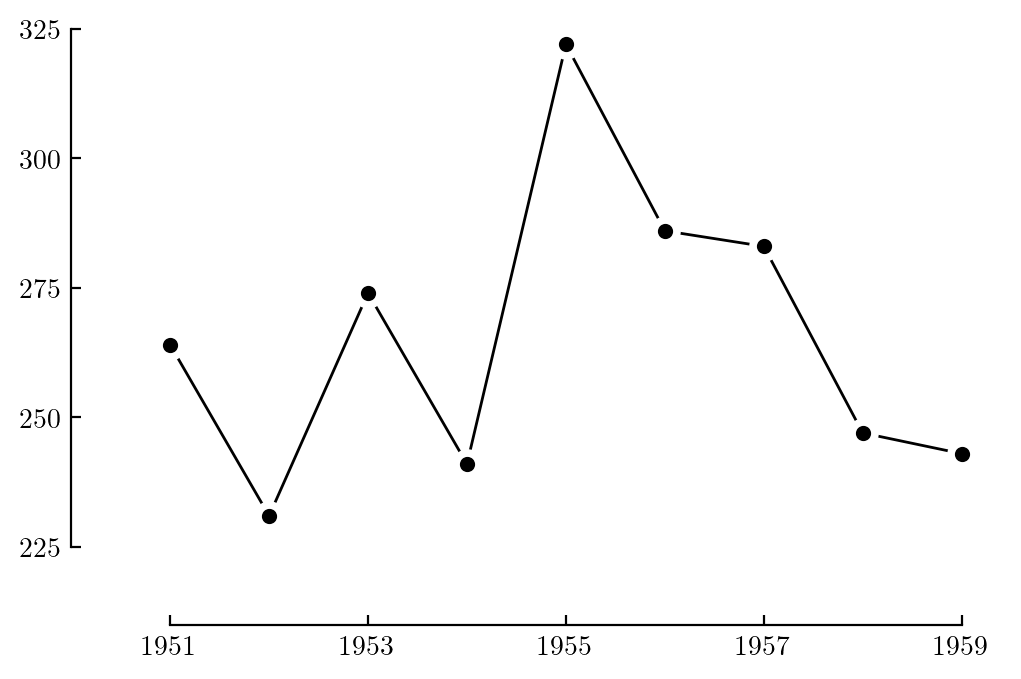

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc

# Global options.
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.family'] = 'serif'
rc('text', usetex=True)


# Data from p74 of Visual Display of Quantitative Information.
x = list(range(1951, 1960))
y = [264, 231, 274, 241, 322, 286, 283, 247, 243]

# Plot line, line masks, then dots.
fig, ax = plt.subplots()
ax.plot(x, y, linestyle='-', color='black', linewidth=1, zorder=1)
ax.scatter(x, y, color='white', s=100, zorder=2)
ax.scatter(x, y, color='black', s=20, zorder=3)

# Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set spine extent.
ax.spines['bottom'].set_bounds(min(x), max(x))
ax.spines['left'].set_bounds(225, 325)

# Reduce tick spacing.
x_ticks = list(range(min(x), max(x)+1, 2))
ax.xaxis.set_ticks(x_ticks)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=25))
ax.tick_params(direction='in')

# Adjust lower limits to let data breathe.
ax.set_xlim([1950, ax.get_xlim()[1]])
ax.set_ylim([210, ax.get_ylim()[1]])

# Axis labels as a title annotation.
# ax.text(1958, 320, 'Connecticut Traffic Deaths,\n1951 - 1959')
plt.show()

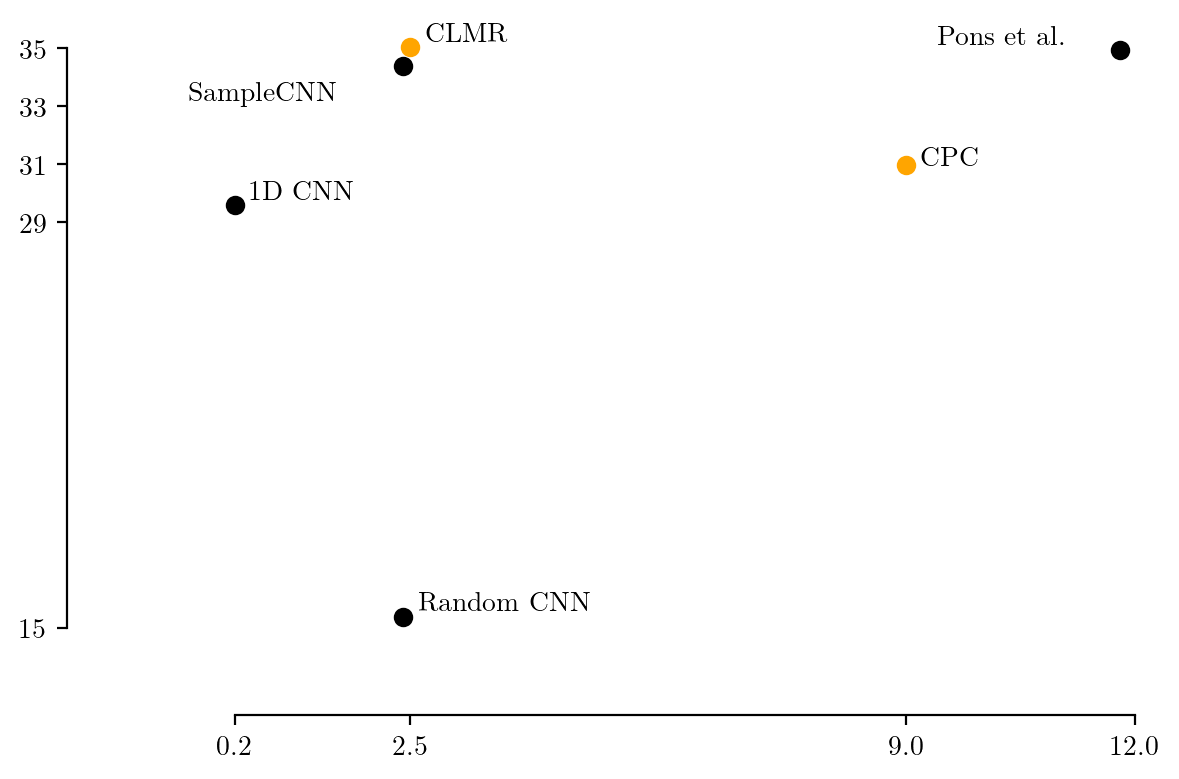

In [133]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

# Plot the dots.
fig, ax = plt.subplots()


# SampleCNN random
random = [2.40, 15.38]
# ax.text(random[0] + padding, random[1] - 3, "Random CNN", fontsize=fontsize)
# ax.plot([random[0], random[0]+0.2], [random[1], random[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
# ax.plot([random[0] + padding, random[0] + 1], [random[1] - 3.2, random[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.scatter(random[0], random[1], color="black")



# Dieleman
dieleman = [0.194, 29.59]
# ax.text(dieleman[0] + padding, dieleman[1] - 3, "1D CNN", fontsize=fontsize)
# ax.plot([dieleman[0], dieleman[0]+0.2], [dieleman[1], dieleman[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
# ax.plot([dieleman[0] + padding, dieleman[0] + 1], [dieleman[1] - 3.2, dieleman[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.scatter(dieleman[0], dieleman[1], color="black")



# # SampleCNN
samplecnn = [2.40, 34.38]
# ax.text(samplecnn[0] + 0.2, samplecnn[1] + 3.2, "SampleCNN", fontsize=fontsize)
# ax.plot([samplecnn[0], samplecnn[0]+0.2], [samplecnn[1], samplecnn[1] + 3], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
# ax.plot([samplecnn[0] + padding, samplecnn[0] + 1], [samplecnn[1] + 3, samplecnn[1] + 3], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.scatter(samplecnn[0], samplecnn[1], color="black")


# # ours
# # CLMR
clmr = [2.5, 35.04]
# ax.text(clmr[0] + padding, clmr[1] - 2, "CLMR", fontsize=fontsize)
# ax.plot([clmr[0], clmr[0]+0.2], [clmr[1], clmr[1] - 2.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
# ax.plot([clmr[0] + padding, clmr[0] + 1], [clmr[1] - 2.2, clmr[1] - 2.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.scatter(clmr[0], clmr[1], color="orange")


# # CPC
cpc = [8.988672, 30.98]# 87.99]
# ax.text(cpc[0] + padding, cpc[1] - 3, "CPC", fontsize=fontsize)
# ax.plot([cpc[0], cpc[0] + 0.2], [cpc[1], cpc[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
# ax.plot([cpc[0] + padding, cpc[0] + 1], [cpc[1] - 3.2, cpc[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.scatter(cpc[0], cpc[1], color="orange")


# # Supervised (Pons et al.)
pons = [11.80, 34.92]
# ax.text(pons[0] - 1.6, pons[1] + 2.2, "SOTA", fontsize=fontsize)
# ax.plot([pons[0], pons[0] - padding], [pons[1], pons[1] + 2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
# ax.plot([pons[0] - padding, pons[0] - 1], [pons[1] + 2, pons[1] + 2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.scatter(pons[0], pons[1], color="black")



# Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase y tick spacing.
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=2))

# Set spine extent.
ax.spines['bottom'].set_bounds(0.2, 12)
ax.spines['left'].set_bounds(35, 15)

# # # More room for data.
ax.set_xlim([-2, 12])
ax.set_ylim([12, 36])

ax.set_xticks([0.2, clmr[0], 9, 12])
ax.set_yticks([15, 29, 31, 33, 35])


ax.annotate('Random CNN', (random[0]+0.2, random[1]+0.2))
ax.annotate('1D CNN', (dieleman[0]+0.2, dieleman[1]+0.2))
ax.annotate('SampleCNN', (samplecnn[0]-2.8, samplecnn[1]-1.2))
ax.annotate('CPC', (cpc[0]+0.2, cpc[1]))
ax.annotate('CLMR', (clmr[0]+0.2, clmr[1]+0.2))
ax.annotate('Pons et al.', (pons[0]-2.4, pons[1]+0.2))

# Title.
# ax.text(15, 12, "The first dataset in\nAnscombe's quartet", size=11)
plt.tight_layout()
plt.savefig("../media/roc_auc_magnatagatune.pdf", bbox_inches = 'tight', pad_inches=0)
plt.show()




# Ablation

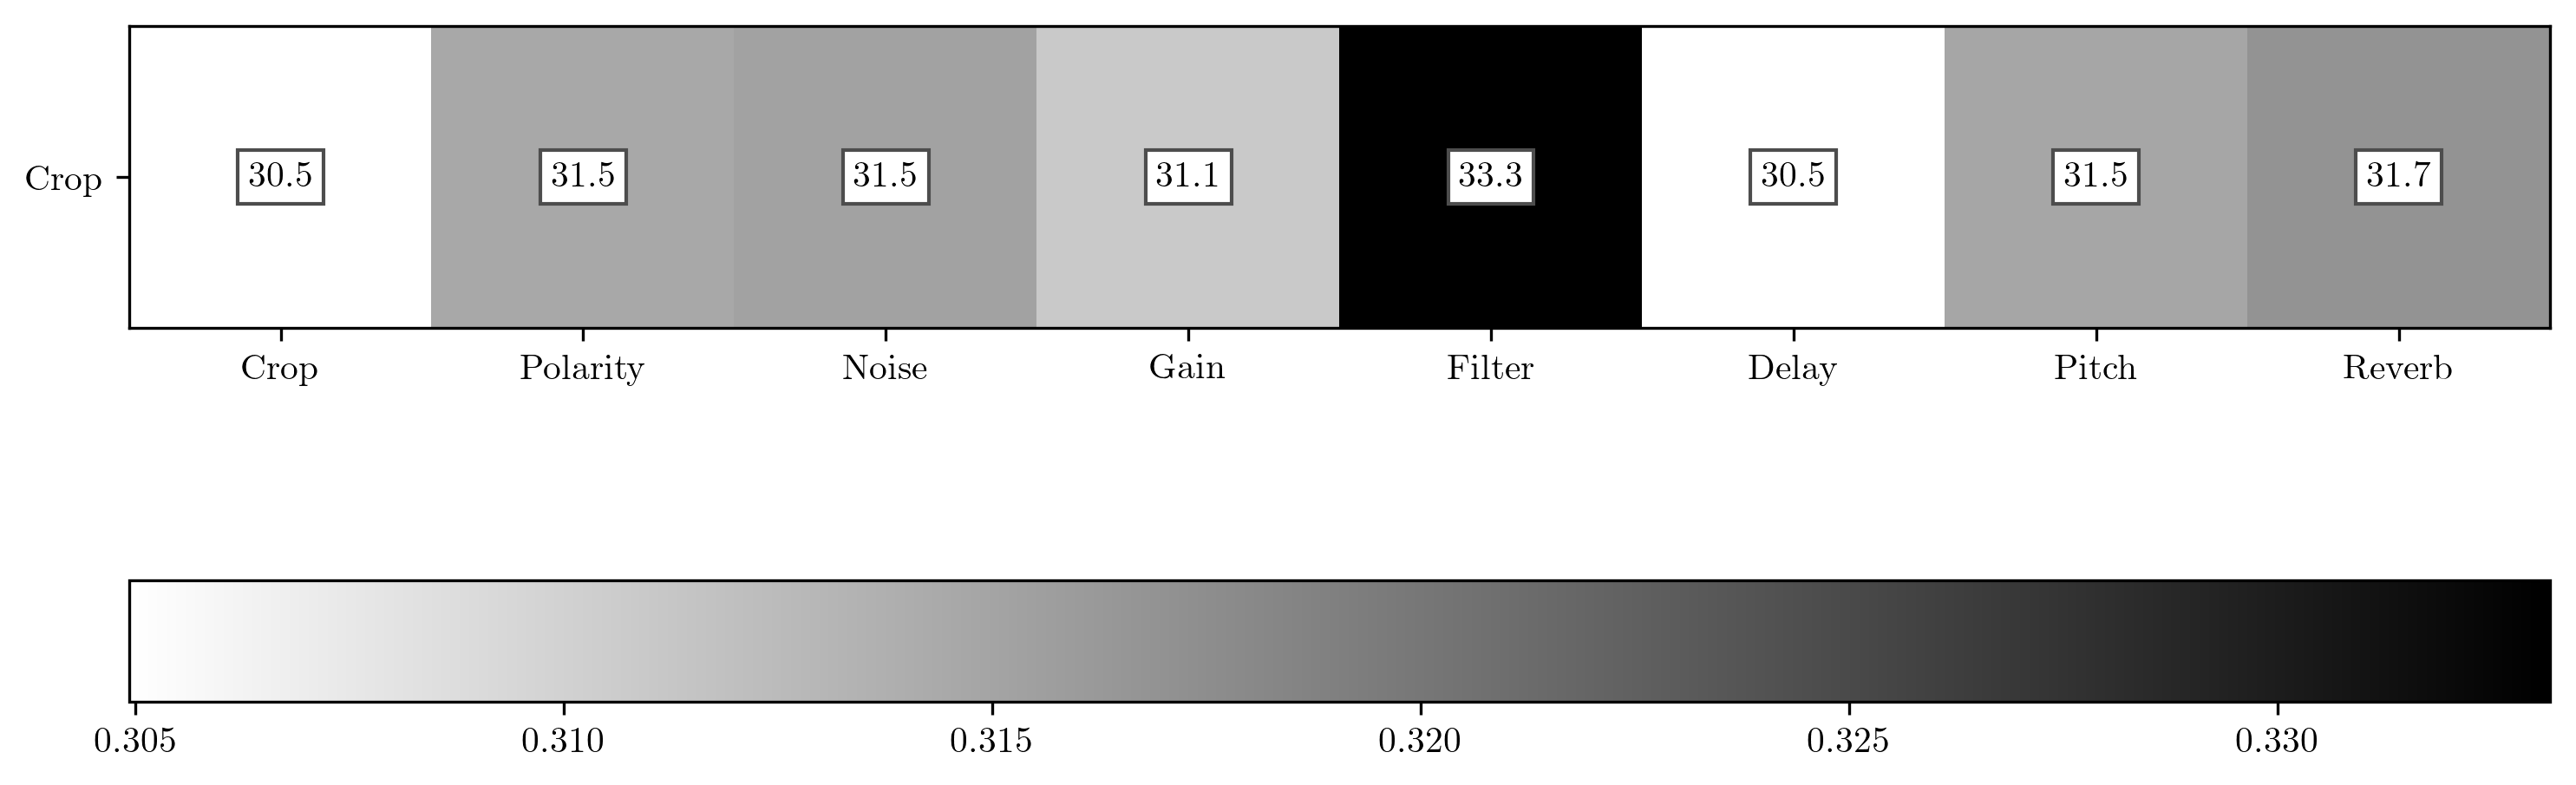

In [275]:
import matplotlib.pyplot as plt
import numpy as np

# transforms_polarity, transforms_noise, transforms_gain, transforms_filters, transforms_delay, transforms_pitch
data = [
    [0.3049333103, 0.3145877378, 0.3152903961, 0.311, 0.3331828125, 0.3049802684, 0.3148446014, 0.3169568994],
]

fig, ax = plt.subplots(dpi=300, figsize=[10,10])
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
im = ax.matshow(data, cmap='gray_r')

for (i, j), z in np.ndenumerate(data):
    if z:
        z = '{:0.1f}'.format(z*100)
    else:
        z = "-"
    ax.text(j, i, z, ha='center', va='center',
            bbox=dict(boxstyle='square', facecolor='white', edgecolor='0.3'))

header = ["Crop", "Polarity", "Noise", "Gain", "Filter", "Delay", "Pitch", "Reverb"]
ax.set_xticks(np.arange(len(data[0])))
ax.set_yticks(np.arange(1))
ax.xaxis.tick_bottom()
ax.set_xticklabels(header, rotation=0)
ax.set_yticklabels([header[0]], rotation=0)
    
fig.colorbar(im, orientation="horizontal", pad=0.1)
plt.tight_layout()
plt.savefig("../media/transformation_study.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

## 0.8-0.4-0.0

In [159]:
# import matplotlib.pyplot as plt
# import numpy as np


# labels = ["Polarity", "Filter", "Delay", "Pitch"]
# zeros = [0.3049333103] * 4
# fours = [0.3132290143, 0.3264228298, 0.3097189801, 0.3157329899]
# eights = [0.3184843979, 0.3349694146, 0.3096827864, 0.3141724191]

# zeros = [z*100 for z in zeros]
# fours = [z*100 for z in fours]
# eights = [z*100 for z in eights]

# x = np.arange(len(labels))  # the label locations
# width = 0.2  # the width of the bars

# fig, ax = plt.subplots(dpi=300, figsize=[10,5])
# rects1 = ax.bar(x - width, zeros, width=width, label='$p=0.0$', align="center")
# rects2 = ax.bar(x, fours, width=width, label='$p=0.4$', align="center")
# rects3 = ax.bar(x + width, eights, width=width, label='$p=0.8$', align="center")

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel("$\mathrm{PR-AUC}_\mathrm{TAG}$")
# # ax.set_title('ROC-AP scores for 4 transformations using different probability values')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)

# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{:0.2f}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

# fig.tight_layout()
# plt.savefig("../media/transformation_probabilities.png")
# plt.show()

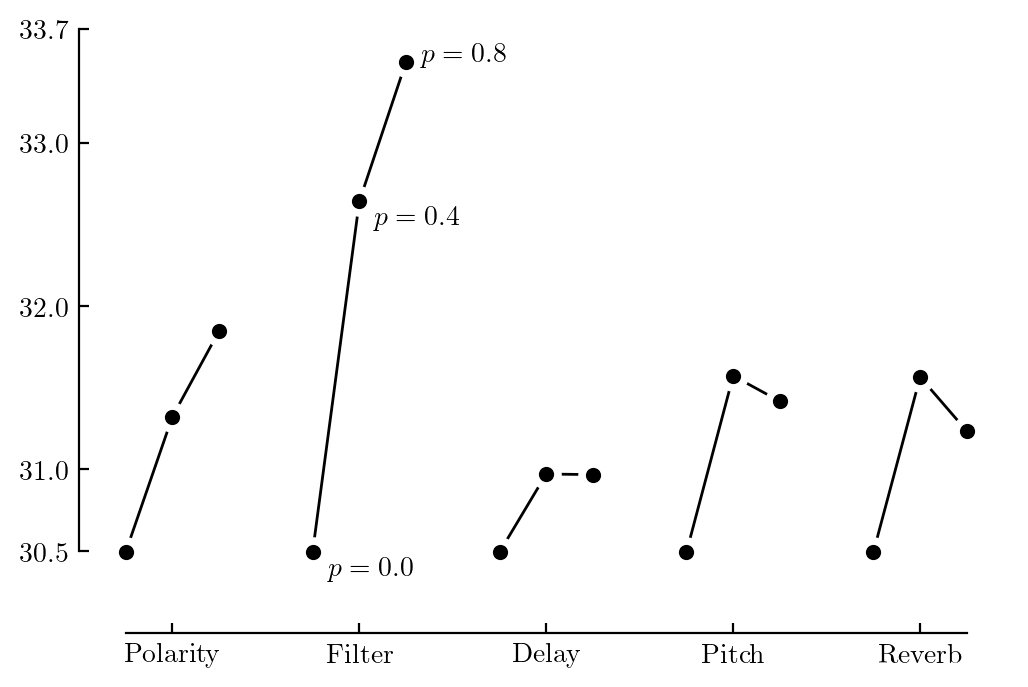

In [160]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Global options.
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.family'] = 'serif'

zeros = [0.3049333103] * 5
fours = [0.3132290143, 0.3264228298, 0.3097189801, 0.3157329899, 0.3156609592]
eights = [0.3184843979, 0.3349694146, 0.3096827864, 0.3141724191, 0.3123469022]




# Data from p74 of Visual Display of Quantitative Information.
x = list(range(4))
ys = []
for z, f, e in zip(zeros, fours, eights):
    ys.append([z*100, f*100, e*100])

# Plot line, line masks, then dots.
fig, ax = plt.subplots()
end_idx = 1
for idx, y in enumerate(ys):
    x = list(range(end_idx, end_idx+3))
    ax.plot(x, y, linestyle='-', color='black', linewidth=1, zorder=1)
    ax.scatter(x, y, color='white', s=100, zorder=2)
    ax.scatter(x, y, color='black', s=20, zorder=3)
    end_idx = x[-1] + 2

# Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set spine extent.
ax.spines['bottom'].set_bounds(1, max(x))
ax.spines['left'].set_bounds(30.5, 33.7)

# Reduce tick spacing.
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=25))
ax.tick_params(direction='in')

ax.set_xticks([2, 6, 10, 14, 18])
ax.set_xticklabels(["Polarity", "Filter", "Delay", "Pitch", "Reverb"])

ax.set_yticks([30.5, 31, 32, 33, 33.7])


# Adjust lower limits to let data breathe.
ax.set_xlim([0, ax.get_xlim()[1]])
ax.set_ylim([30, ax.get_ylim()[1]])

ax.annotate('$p=0.0$', (5.3, 30.35))
ax.annotate('$p=0.4$', (6.3, 32.5))
ax.annotate('$p=0.8$', (7.3, 33.5))

# Axis labels as a title annotation.
# ax.text(1958, 320, 'Connecticut Traffic Deaths,\n1951 - 1959')
plt.savefig("../media/transformation_probabilities.pdf")
plt.show()

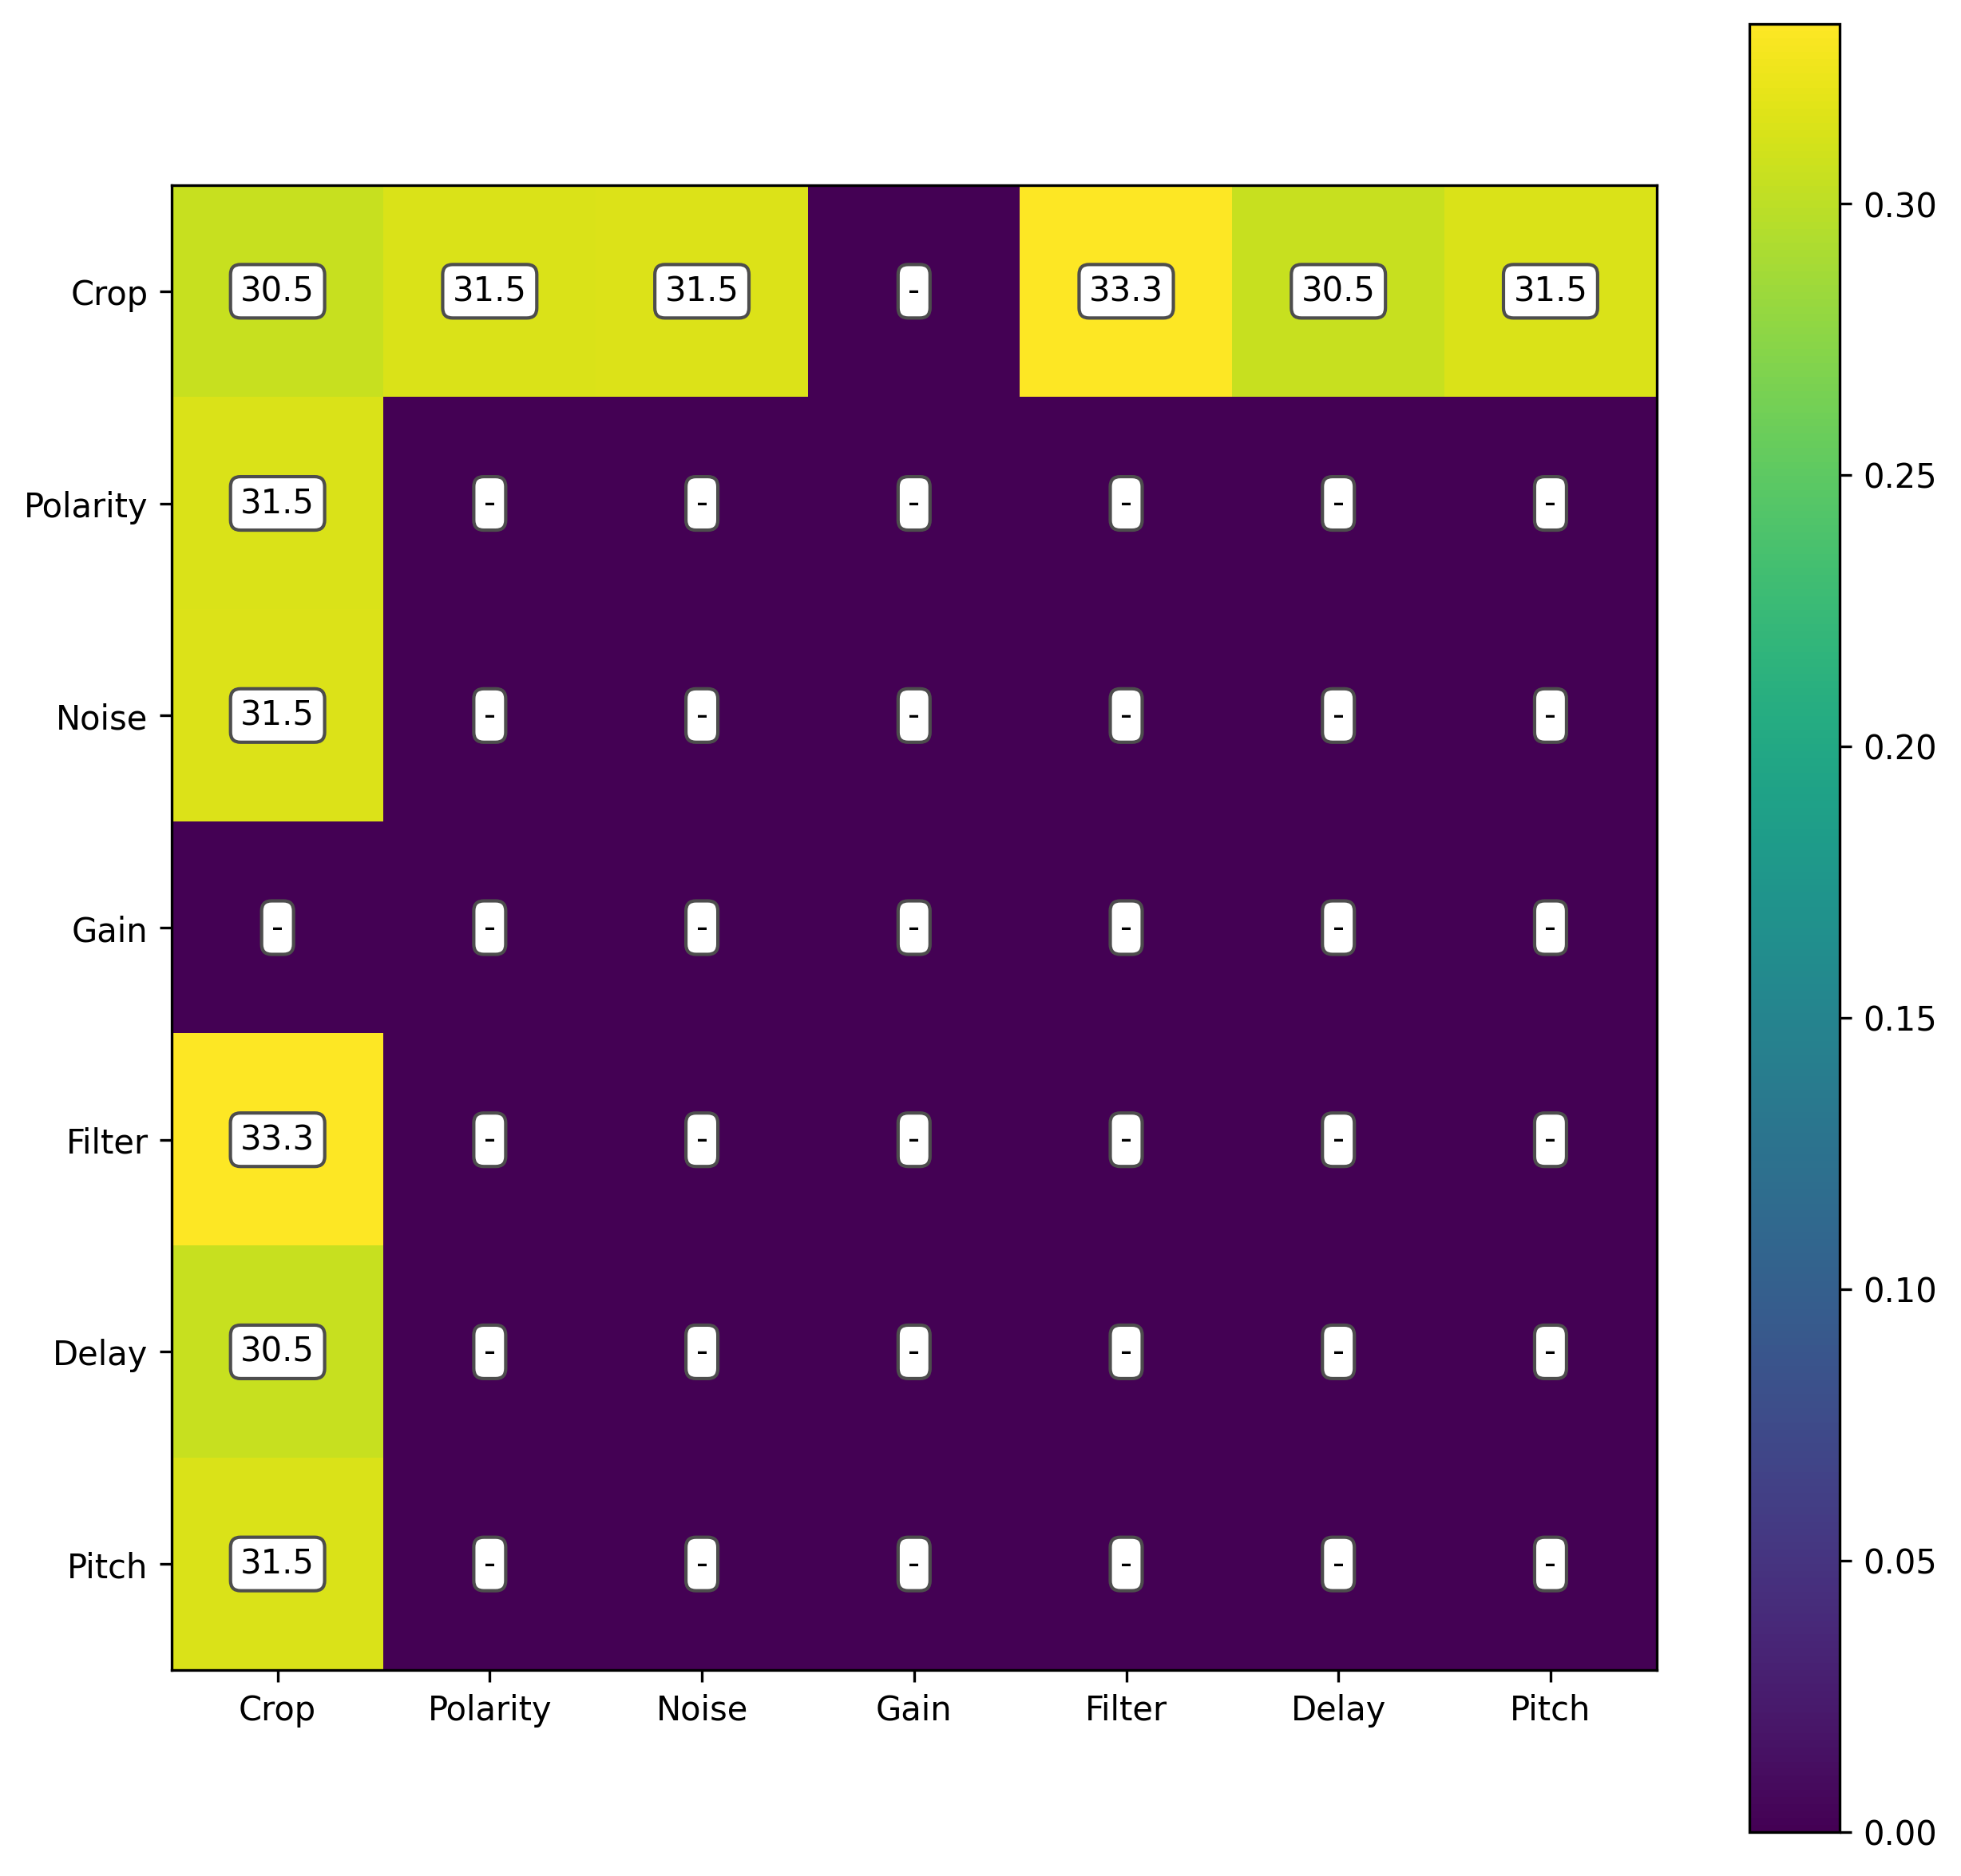

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# transforms_polarity, transforms_noise, transforms_gain, transforms_filters, transforms_delay, transforms_pitch
data = [
    [0.3049333103, 0.3145877378, 0.3152903961, 0, 0.3331828125, 0.3049802684, 0.3148446014],
    [0.3145877378, 0, 0, 0, 0, 0, 0],
    [0.3152903961, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0.3331828125, 0, 0, 0, 0, 0, 0],
    [0.3049802684, 0, 0, 0, 0, 0, 0],
    [0.3148446014, 0, 0, 0, 0, 0, 0]
]

fig, ax = plt.subplots(dpi=300, figsize=[10,10])
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
im = ax.matshow(data)

for (i, j), z in np.ndenumerate(data):
    if z:
        z = '{:0.1f}'.format(z*100)
    else:
        z = "-"
    ax.text(j, i, z, ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

header = ["Crop", "Polarity", "Noise", "Gain", "Filter", "Delay", "Pitch"]
ax.set_xticks(np.arange(7))
ax.set_yticks(np.arange(7))
ax.xaxis.tick_bottom()
ax.set_xticklabels(header, rotation=0)
ax.set_yticklabels(header, rotation=0)
    
fig.colorbar(im)
plt.show()

# Dataset statistics

In [5]:
%cd "/home/jspijkervet/git/clmr/"

/home/jspijkervet/git/clmr


In [6]:
import sys
sys.path.append("../")
from utils import parse_args
from data import get_dataset

/home/jspijkervet/miniconda3/envs/clmr/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/jspijkervet/miniconda3/envs/clmr/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [7]:
args = parse_args("./config/config.yaml")
args.world_size = 1
args.supervised = 1
args.dataset = "msd" # magnatagatune

usage: ipykernel_launcher.py [-h] [--id ID] [--nodes NODES] [--gpus GPUS]
                             [--local_rank LOCAL_RANK] [--workers WORKERS]
                             [--dataparallel DATAPARALLEL]
                             [--ablation ABLATION]
                             [--backprop_encoder BACKPROP_ENCODER]
                             [--dataset DATASET]
                             [--data_input_dir DATA_INPUT_DIR]
                             [--pretrain_dataset PRETRAIN_DATASET]
                             [--download DOWNLOAD] [--load_ram LOAD_RAM]
                             [--domain DOMAIN] [--task TASK]
                             [--model_name MODEL_NAME] [--seed SEED]
                             [--batch_size BATCH_SIZE]
                             [--start_epoch START_EPOCH] [--epochs EPOCHS]
                             [--checkpoint_epochs CHECKPOINT_EPOCHS]
                             [--audio_length AUDIO_LENGTH]
                             [--sa

SystemExit: 2

/home/jspijkervet/miniconda3/envs/clmr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# data loaders
(
    train_loader,
    train_dataset,
    val_loader,
    val_dataset,
    test_loader,
    test_dataset,
) = get_dataset(args, pretrain=True, download=args.download)

In [ ]:
from collections import Counter
counter = Counter()
no_tags = 0
with_tags = 0
for t, c, s, fp, labels in train_dataset.index:
    if s == 0:
        if sum(labels) == 0:
            no_tags += 1
        else:
            with_tags += 1
            for idx, l in enumerate(labels):
                if l != 0:
                    counter[idx] += 1

In [ ]:
print(counter)
print("Tracks with tags:", with_tags)
print("Tracks without tags:", no_tags)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


new_counter = {}
for k, v in counter.items():
    tag_name = train_dataset.tags[k]
    new_counter[tag_name] = v

new_counter = {k: v for k, v in sorted(new_counter.items(), key=lambda item: item[1], reverse=True)}
fig, ax = plt.subplots(figsize=(10,5), dpi=300)
plt.xticks(rotation=90)
plt.bar(new_counter.keys(), new_counter.values())
plt.grid(alpha=0.2)
plt.show()

# % data

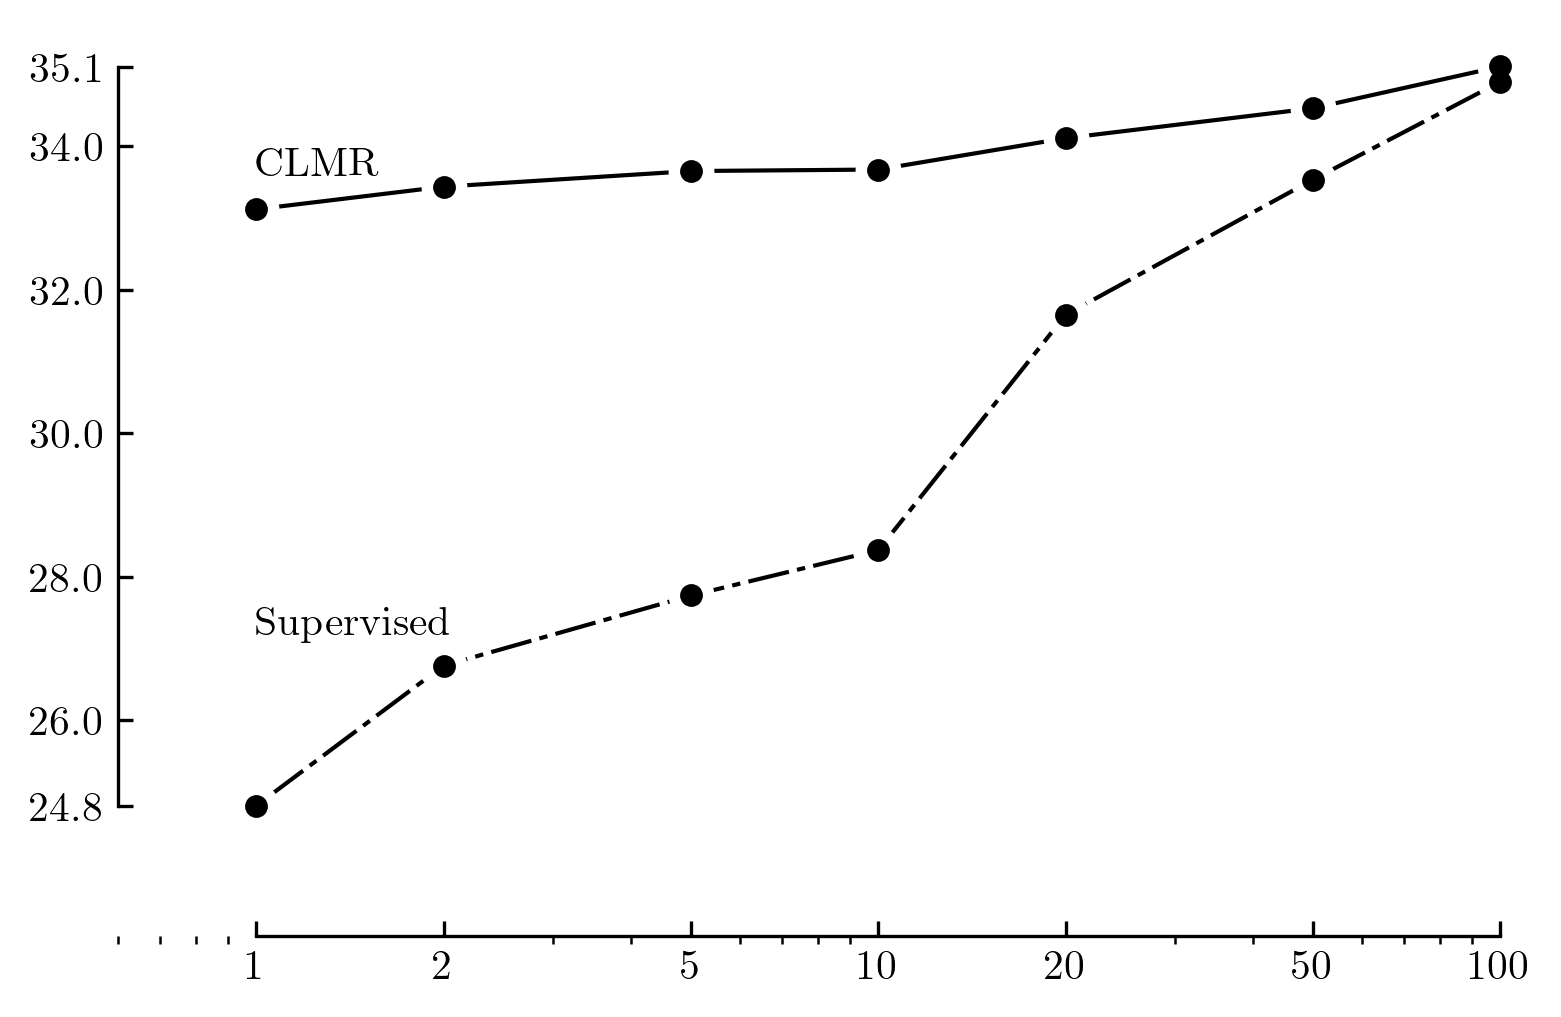

In [15]:
import matplotlib
fig, ax = plt.subplots(dpi=300)# , figsize=[10,10])

x = [1, 2, 5, 10, 20, 50, 100]
y_supervised = [0.2481060052, 0.2676216138, 0.2774009193, 0.2837149846, 0.3165081726, 0.3353737326, 0.349]
y_clmr = [0.3312287988, 0.334380795, 0.3365588041, 0.3367692374, 0.341142047, 0.3453113002, 0.3511349448]

y_supervised = [y*100 for y in y_supervised]
y_clmr = [y*100 for y in y_clmr]


exp = lambda x: 10**(x)
log = lambda x: np.log(x)

line1, = ax.plot(x, y_supervised, linestyle='-', color='black', linewidth=1, zorder=1)
line1.set_dashes([2, 2, 10, 2])

ax.scatter(x, y_supervised, color='white', s=100, zorder=2)
ax.scatter(x, y_supervised, color='black', s=20, zorder=3)

ax.plot(x, y_clmr, linestyle='-', color='black', linewidth=1, zorder=1)
ax.scatter(x, y_clmr, color='white', s=100, zorder=2)
ax.scatter(x, y_clmr, color='black', s=20, zorder=3)


ax.set_xlim(0.6)
ax.set_ylim(23)

# tufte
# Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set spine extent.
ax.spines['bottom'].set_bounds(1, 100)
ax.spines['left'].set_bounds(round(max(y_clmr), 1), round(min(y_supervised), 1))

# Reduce tick spacing.
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=25))
ax.tick_params(direction='in')

ax.set_xscale("log")
ax.set_xticks(x)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax.set_xlabel("Percentage of labeled data")
# ax.set_ylabel("$\mathrm{PR-AUC}_\mathrm{TAG}$")
# ax.grid(alpha=0.4, which="both")
ax.set_yticks([round(min(y_supervised), 1), 26, 28, 30, 32, 34, round(max(y_clmr), 1)])

ax.annotate("CLMR", (1, 33.6))
ax.annotate("Supervised", (1, 27.2))

plt.savefig("../media/perc_train_data_magnatagatune.pdf")
plt.show()

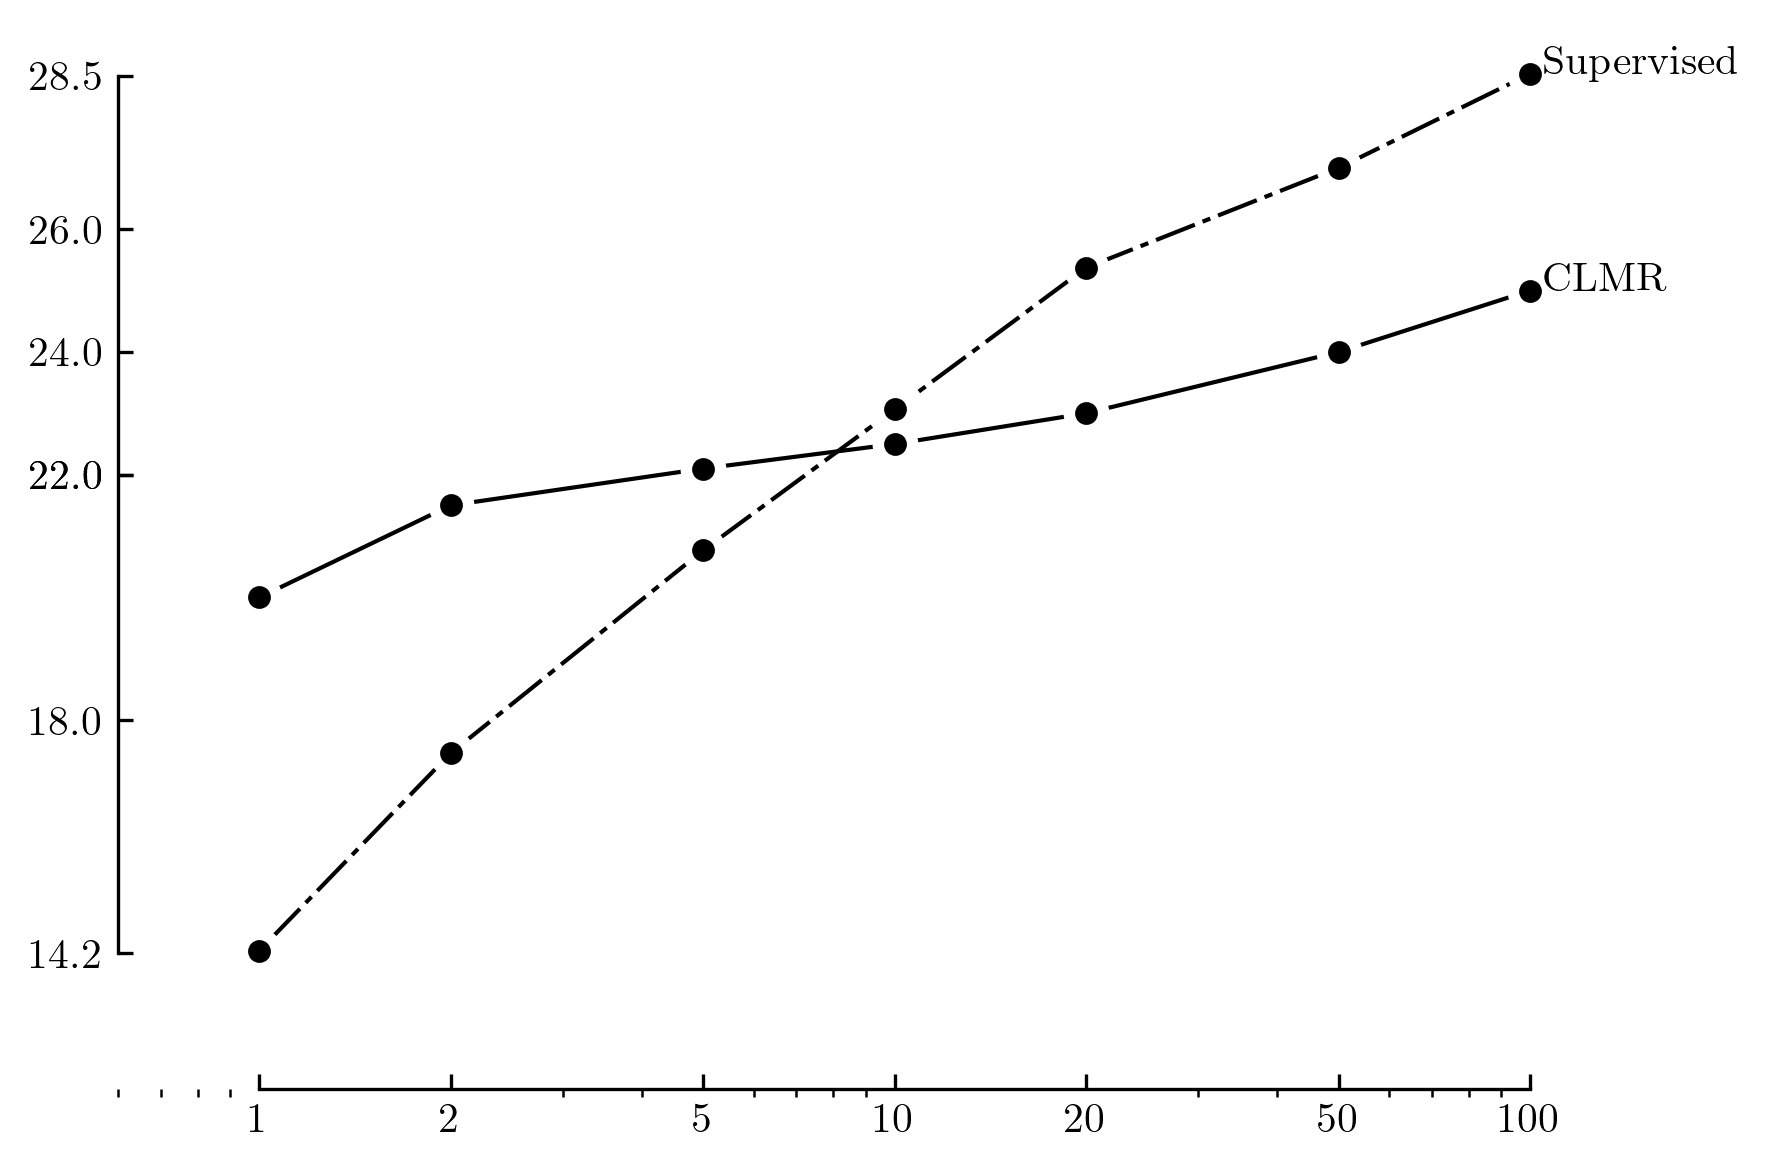

In [5]:
import matplotlib
fig, ax = plt.subplots(dpi=300)# , figsize=[10,10])

x = [1, 2, 5, 10, 20, 50, 100]
y_supervised = [0.142459478, 0.1746154544, 0.2077151655, 0.2306486951, 0.2537141118, 0.27, 0.2853]
y_clmr = [0.20, 0.215, 0.221, 0.225, 0.23, 0.24, 0.25]

y_supervised = [y*100 for y in y_supervised]
y_clmr = [y*100 for y in y_clmr]

exp = lambda x: 10**(x)
log = lambda x: np.log(x)

line1, = ax.plot(x, y_supervised, linestyle='-', color='black', linewidth=1, zorder=1)
line1.set_dashes([2, 2, 10, 2])

ax.scatter(x, y_supervised, color='white', s=100, zorder=2)
ax.scatter(x, y_supervised, color='black', s=20, zorder=3)

ax.plot(x, y_clmr, linestyle='-', color='black', linewidth=1, zorder=1)
ax.scatter(x, y_clmr, color='white', s=100, zorder=2)
ax.scatter(x, y_clmr, color='black', s=20, zorder=3)

ax.set_xlim(0.6)
ax.set_ylim(12)

# tufte
# Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set spine extent.
ax.spines['bottom'].set_bounds(1, 100)
ax.spines['left'].set_bounds(round(max(y_supervised), 1), round(min(y_supervised), 1))

# Reduce tick spacing.
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=25))
ax.tick_params(direction='in')

ax.set_xscale("log")
ax.set_xticks(x)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_yticks([round(min(y_supervised), 1), 18, 22, 26, 22, 24, round(max(y_supervised), 1)])

ax.annotate("CLMR", (105, max(y_clmr)))
ax.annotate("Supervised", (105, max(y_supervised)))

plt.tight_layout()
plt.savefig("../media/perc_train_data_msd.pdf")
plt.show()